# Frequency-Domain Linear Regression

此示例演示如何使用numpy库中的离散傅里叶变换为时间序列构造线性回归模型。此示例中使用的时间序列是 1973 年至 1979 年美国每月意外死亡人数。

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
ts= np.array( [9007.+0j,8106.+0j,8928.+0j,9137.+0j,10017.+0j,10826.+0j,11317.+0j,10744.+0j,9713.+0j,9938.+0j,9161.+0j,8927.+0j,
                7750.+0j,6981.+0j,8038.+0j,8422.+0j,8714.+0j,9512.+0j,10120.+0j,9823.+0j,8743.+0j,9129.+0j,8710.+0j,8680.+0j,
                8162.+0j,7306.+0j,8124.+0j,7870.+0j,9387.+0j,9556.+0j,10093.+0j,9620.+0j,8285.+0j,8433.+0j,8160.+0j,8034.+0j,
                7717.+0j,7461.+0j,7776.+0j,7925.+0j,8634.+0j,8945.+0j,10078.+0j,9179.+0j,8037.+0j,8488.+0j,7874.+0j,8647.+0j,
                7792.+0j,6957.+0j,7726.+0j,8106.+0j,8890.+0j,9299.+0j,10625.+0j,9302.+0j,8314.+0j,8850.+0j,8265.+0j,8796.+0j,
                7836.+0j,6892.+0j,7791.+0j,8129.+0j,9115.+0j,9434.+0j,10484.+0j,9827.+0j,9110.+0j,9070.+0j,8633.+0j,9240.+0j])

将数据矩阵重塑为 72 x 1 的时间序列，并绘制 1973 年至 1978 年的数据。

Text(0, 0.5, 'Number of Accidental Deaths')

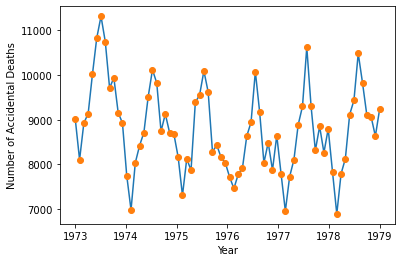

In [4]:
years = np.linspace(1973,1979,72)
plt.plot(years,np.real(ts))
plt.plot(years,np.real(ts),'o')
plt.xlabel('Year')
plt.ylabel('Number of Accidental Deaths')

要在时域中构建线性回归模型，必须指定余弦和正弦的频率，形成设计矩阵，并求解正态方程，以获得模型参数的最小二乘估计值。在这种情况下，使用离散傅里叶变换来检测周期性，仅保留傅里叶系数的子集，并反转变换以获得拟合的时间序列会更容易。

对数据执行频谱分析，以揭示哪些频率对数据中的可变性有显著贡献。由于信号的总均值约为 9，000，并且与 0 频率下的傅里叶变换成正比，因此在频谱分析之前减去均值。这降低了0频率下较大的傅里叶系数，并使任何显着的振荡更容易检测。傅里叶变换中的频率以时间序列长度 1/72 的倒数间隔间隔。每月对数据进行采样，光谱分析中的最高频率为1个周期/2个月。

(72,)


Text(0.5, 0, 'Cycles/Year')

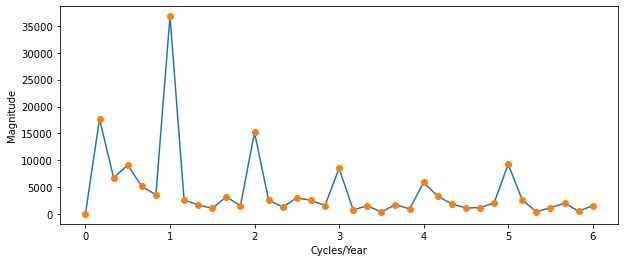

In [5]:
tsdft = np.fft.fft(ts-np.mean(ts))
print(tsdft.shape)
freq = np.linspace(0,0.5,37)
plt.figure(figsize=(10,4))
plt.plot(freq*12,np.abs(tsdft[0:int(len(ts)/2)+1]))
plt.plot(freq*12,np.abs(tsdft[0:int(len(ts)/2)+1]),'o')
plt.ylabel("Magnitude")
plt.xlabel("Cycles/Year")

根据幅度，1周期/12个月的频率是数据中最重要的振荡。1周期/12个月的星等是任何其他星等的两倍多。然而，光谱分析显示，数据中还有其他周期性成分。例如，在 1 周期/12 个月的谐波（整数倍）处似乎存在周期性分量。似乎还有一个周期性成分，周期为1个周期/ 72个月。

根据数据的频谱分析，使用余弦和正弦项拟合简单的线性回归模型，其频率为最重要的分量：1 周期/年（1 周期/12 个月）。

确定离散傅里叶变换中对应于 1 个周期/12 个月的频率箱。由于频率间隔为 1/72，并且第一个 bin 对应于 0 频率，因此正确的 bin 是 72/12+1。这是正频率的频率箱。您还必须包括与负频率相对应的频率箱：-1 周期/12 个月。使用 MATLAB 分度时，负频率的频率箱为 72-72/12+1。

创建一个 72 x 1 的零向量。用对应于 1 个周期/12 个月的正负频率的傅里叶系数填充矢量的相应元素。反转傅里叶变换并添加总体均值以获得与意外死亡数据的拟合。

In [6]:
tsfit = np.zeros([72,1],dtype = complex)
tsfit[6] = tsdft[6]
tsfit[66] = tsdft[66]
tsfit = np.array(tsfit.transpose())
print(tsfit.shape)
tsfit = np.fft.ifft(np.round(tsfit,0))

(1, 72)


使用两个傅里叶系数绘制原始数据和拟合序列。



Text(0, 0.5, 'Number of Accidental Deaths')

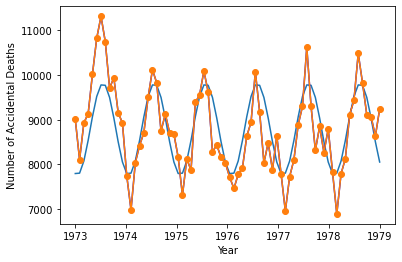

In [7]:
mu = np.mean(ts)
tsfitt = mu+tsfit
plt.plot(years,np.real(tsfitt).transpose())
plt.plot(years,np.real(ts),'b')
plt.plot(years,np.real(ts),marker = 'o')
plt.xlabel("Year")
plt.ylabel("Number of Accidental Deaths")
#plt.scatter(years, np.real(ts), color='', marker='o', edgecolors='g', s=200) # 把 corlor 设置为空，通过edgecolors来控制颜色

In [8]:
def xcorr(x,y,timelaggy):
    x = x.flatten()
    y = y.flatten()
    out = np.correlate(x,y,'full')
    midIndex = int(len(out)/2)
    mid = out[midIndex]
    autocor = out/mid
    if timelaggy>len(out)/2:
        autocor = autocor
        lags = np.linspace(-len(out)/2,len(out)/2,2*len(out)+1  )
    else :
        autocor = autocor[midIndex-timelaggy:midIndex+timelaggy+1]
        lags = np.linspace(-timelaggy,timelaggy,2*timelaggy+1)
    return autocor,lags

拟合模型似乎捕获了数据的一般周期性，并支持数据以1年的周期振荡的初步结论。

要评估 1 个周期/12 个月的单一频率对观测时间序列的充分程度，请形成残差。如果残差类似于白噪声序列，则具有一个频率的简单线性模型已对时间序列进行了充分的建模。

要评估残差，请使用白噪声具有 95% 置信区间的自相关序列。

Text(0.5, 1.0, 'Autocorrelation of Residuals')

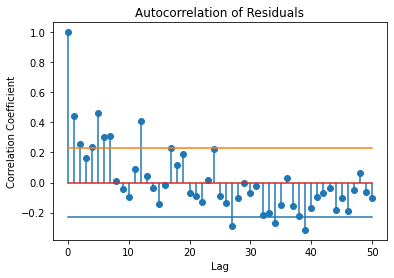

In [9]:
resid = ts - tsfitt
resid = np.real(resid)
xc,lags = xcorr(resid,resid,50)
plt.stem(lags[50:len(lags)],xc[50:len(xc)])
lconf = -1.96*np.ones([51,1])/np.math.sqrt(72)
uconf = 1.96*np.ones([51,1])/np.math.sqrt(72)
plt.plot(lconf)
plt.plot(uconf)
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.title('Autocorrelation of Residuals')

自相关值在多个滞后处落在 95% 置信区界之外。残差似乎不是白噪声。结论是，具有一个正弦分量的简单线性模型不能解释意外死亡次数中的所有振荡。这是可以预料的，因为光谱分析揭示了除了主要振荡之外的其他周期性成分。创建包含光谱分析所指示的其他周期项的模型将改善拟合并美白残差。

拟合由三个最大傅里叶系数大小组成的模型。由于必须保留对应于负频率和正频率的傅里叶系数，因此请保留最大的 6 个指数。

In [10]:
tsfit2dft = np.zeros([72],dtype=complex)
print(tsfit2dft.shape)
print(tsdft.shape)
I = np.argsort(np.abs(tsdft))
I = np.flipud(I)
I = I[0:6]
for i in I:
    tsfit2dft[i] = tsdft[i]

(72,)
(72,)


证明仅保留72个傅里叶系数（3个频率）中的6个可以保留大部分信号能量。首先，证明保留所有傅里叶系数会产生原始信号和傅里叶变换之间的能量等价性。

In [11]:
np.linalg.norm(1/np.math.sqrt(72)*tsdft,2)/np.linalg.norm(ts-np.mean(ts),2)

0.9999999999999999

该比率为 1。现在，检查仅保留 3 个频率的能量比。

In [12]:
np.linalg.norm(1/np.math.sqrt(72)*tsfit2dft,2)/np.linalg.norm(ts-np.mean(ts),2)

0.8990884437844658

几乎90%的能量被保留下来。等价地，时间序列方差的90%由3个频率分量占。

根据 3 个频率分量形成数据估计值。比较原始数据、具有一个频率的模型和具有 3 个频率的模型。

Text(0, 0.5, 'Number of Accidental Deaths')

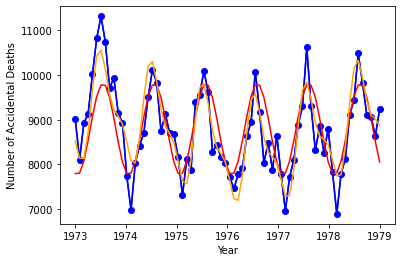

In [14]:
tsfit2 = mu + np.fft.ifft(tsfit2dft)
plt.plot(years,np.real(ts),'b')
plt.plot(years,np.real(ts),marker = 'o',color = 'blue')
plt.plot(years,np.real(tsfitt).transpose(),color = 'red')
plt.plot(years,np.real(tsfit2),color = 'orange')
plt.xlabel("Year")
plt.ylabel("Number of Accidental Deaths")

使用3个频率提高了与原始信号的拟合度。您可以通过检查 3 频模型中残差的自相关来查看这一点。

Text(0.5, 1.0, 'Autocorrelation of Residuals')

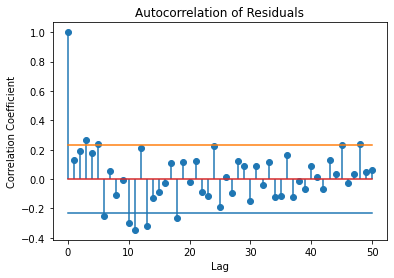

In [15]:
resid = ts - tsfit2
resid = np.real(resid)
xc,lags = xcorr(resid,resid,50)
plt.stem(lags[50:len(lags)],xc[50:len(xc)])
lconf = -1.96*np.ones([51,1])/np.math.sqrt(72)
uconf = 1.96*np.ones([51,1])/np.math.sqrt(72)
plt.plot(lconf)
plt.plot(uconf)
plt.xlabel('Lag')
plt.ylabel('Correlation Coefficient')
plt.title('Autocorrelation of Residuals')

使用3个频率导致残差更接近白噪声过程。

证明从傅里叶变换获得的参数值等效于时域线性回归模型。通过形成设计矩阵并求解法线方程，找到三个频率的总体均值、余弦幅度和正弦幅度的最小二乘估计值。将拟合时间序列与从傅里叶变换获得的时间序列进行比较。

In [16]:
X = np.zeros([72,7])
X[:,0] = 1
X[:,1] = np.cos(2*np.pi/72*np.linspace(0,71,72)).transpose()
X[:,2] = np.sin(2*np.pi/72*np.linspace(0,71,72)).transpose()
X[:,3] = np.cos(2*np.pi*6/72*np.linspace(0,71,72)).transpose()
X[:,4] = np.sin(2*np.pi*6/72*np.linspace(0,71,72)).transpose()
X[:,5] = np.cos(2*np.pi*12/72*np.linspace(0,71,72)).transpose()
X[:,6] = np.sin(2*np.pi*12/72*np.linspace(0,71,72)).transpose()

In [17]:
print(X.shape)
ts2 = np.zeros([72,1])
for i in range(len(ts)):
    ts2[i,0] = np.real(ts[i])
#ts = np.array(ts)
print(ts2.shape)
beta = np.linalg.lstsq(X,ts2)

(72, 7)
(72, 1)


D:\anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


In [18]:
bete = np.array(beta[0])
bete.shape
tsfit_lm = X.dot(bete)

In [19]:
# print(tsfit_lm.shape)
# print(tsfit2.shape)
aa = np.abs(tsfit_lm.ravel()-np.real(tsfit2))
print(np.max(aa))

1.2732925824820995e-11


使用3个频率导致残差更接近白噪声过程。

证明从傅里叶变换获得的参数值等效于时域线性回归模型。通过形成设计矩阵并求解法线方程，找到三个频率的总体均值、余弦幅度和正弦幅度的最小二乘估计值。将拟合时间序列与从傅里叶变换获得的时间序列进行比较。